## Descomposición de la Serie de tiempo AUTP

##### Oscar Julian Layton

## Carga de datos

Para desarrollar una secuencia de pasos para el analisis de la serie de tiempo AUTP que hace parte de la base accidentes. Se hace necesario usar **Python** como herramienta computacional, en un primer paso se necesitaran de las siguientes librerias las cuales ayudaran para cargar los datos. 

In [147]:
import os
os.chdir("C:\\Users\\YULY\\Desktop\\Desktop\\UNAL 2018\\series de tiempo\\codigos")

#import rpy2
import pandas as pd
import numpy as np
import scipy as sp
from pandas import Series
import matplotlib.pyplot as plt
from matplotlib import pyplot

Para obtener la serie, se convierte la informacion en un objeto de series de tiempo con la siguiente linea, asi mismo se procede a realizar su representacion grafica:

In [148]:
data2=pd.ExcelFile('Base_Accidentes.xlsx')
#print(data2.sheet_names)  #Nombres de las hojas de la base
data2=data2.parse('DATA2005') #Data Frame de la hoja "Datos"

In [149]:
ind = pd.date_range(start='1/1/2005', end='8/1/2018', freq='M')
accidentes = data2.set_index(ind)
#accidentes2.head

In [150]:
ts = accidentes['AUTP'] ; ts.head(10)

2005-01-31    6779
2005-02-28    7676
2005-03-31    7862
2005-04-30    9102
2005-05-31    9128
2005-06-30    8934
2005-07-31    8656
2005-08-31    9258
2005-09-30    9833
2005-10-31    9117
Freq: M, Name: AUTP, dtype: int64

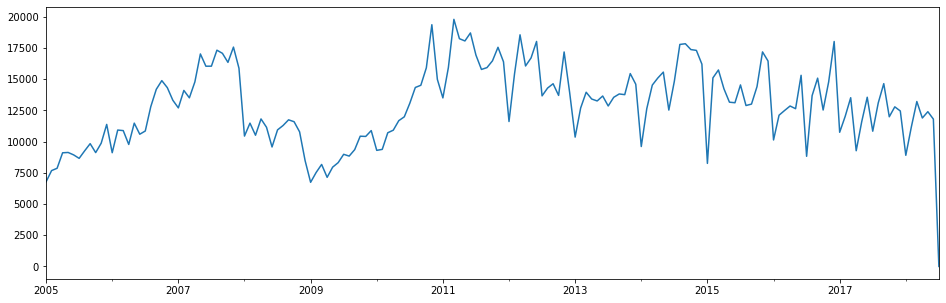

In [151]:
ts.plot(figsize=(16,5))
pyplot.show()

Observando la anterior, claramente la serie no es estacionaria, puesto que no tiene ningun patron, la serie no tiene una media constante al transcurrir los años **"la media no es la misma a lo largo del tiempo"**, asi mismo se logra observar una tendencia en los primeros años la cual decrece aproximadamente en los ultimos años.

# Descomposicion basada promedios moviles

Para el proceso estocastico AUTP $\{  X_t \}$ no estacionario, existen diversas estrategias para convertirlo en un proceso $\{  Y_t \}$ estacionario, se propone desarrollar el metodo de descomposicion basado en filtros el cual consiste en estimar los componentes de $\{  X_t \}$ de la siguiente forma:

$$X_t = M_t + S _t + Y_t$$


Donde llamaremos a $M_t$ el componente de tendencia, a $S_t$ la componente estacional, la filosofia consiste en estimar estas componentes y luego restarlas al proceso no estacionario para convertirlo en $Y_t$ el cual es estacionario.

### Desarrollo

En referencia a la serie de tiempo, se logra observar que a traves del tiempo la varianza alcanza a aumentar, dado lo anterior se ve la necesidad de estabilixar la varianza, en este orden de ideas se usara la transformacion **Box-Cox** el cual transforma los datos de la serie segun un lambda especifico el cual logre homogeneizar la varianza, dicha transformacion tiene la forma:

$$
f_x(U_t)=\left\{\begin{matrix}
 \lambda^-1 (U^{\lambda}_t - 1) & U_t\geq 0 & \lambda>0\\ 
Ln (U_t) & U_t >0 & \lambda=0
\end{matrix}\right.
$$


Este procedimiento puede ser usaro rapidamente en R por medio del siguiente codigo:


In [152]:
posdata = ts[ts > 0]   #hay un valor 0, se excluyó

import scipy.stats
sp.stats.boxcox(posdata,alpha=0.05)

(array([1547.3849625 , 1711.07030868, 1744.54075655, 1964.00069916,
        1968.53837856, 1934.6200928 , 1885.76824636, 1991.18983263,
        2090.66300959, 1966.61889353, 2096.68133928, 2351.98311717,
        1965.04807596, 2276.24777746, 2268.8272498 , 2079.81966516,
        2369.0313229 , 2219.77411636, 2263.42689342, 2587.63469094,
        2812.37338438, 2923.30525299, 2833.52105823, 2671.05368148,
        2571.10420169, 2797.77237369, 2702.33833864, 2906.92867598,
        3258.27839585, 3105.18715067, 3105.81368125, 3304.81353651,
        3265.86455369, 3153.34311646, 3342.88455437, 3079.7874155 ,
        2194.47118629, 2369.0313229 , 2206.0273505 , 2425.15281105,
        2313.60102219, 2044.96126689, 2278.60765342, 2337.25133145,
        2413.35476788, 2388.21759046, 2252.27901011, 1854.33148059,
        1539.80762806, 1683.24062193, 1799.45605893, 1613.1821702 ,
        1760.68156291, 1825.07762833, 1942.67521888, 1917.78374623,
        2007.8779647 , 2192.77053681, 2189.70858

Por consiguiente el valor de lambda es cercano a 1, en este orden de ideas lo mas aconsejable es no realizar una transformacion a los datos, en otras palabras no es necesario estabilizar la varianza:

Como segundo paso, se realiza propiamente el proceso basado en promedios moviles

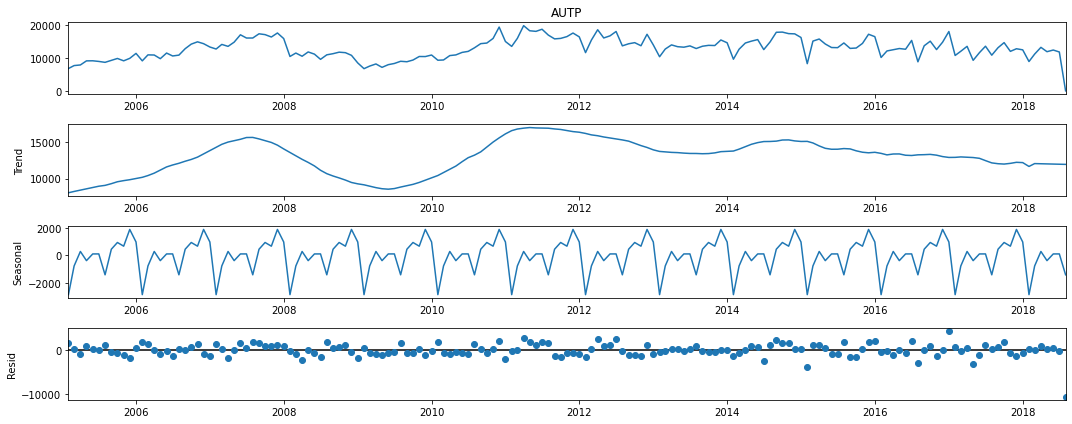

In [153]:
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 15, 6


####Descomposición usando filtros
from statsmodels.tsa.seasonal import seasonal_decompose
from matplotlib import pyplot

###También se puede hacer vía STL###
result = seasonal_decompose(ts, model='additive',extrapolate_trend=6)

result.plot()
pyplot.show()

En la grafica anterior puede observarse el resumen del proceso de descomposicion realizado, mostrandose en la primera grafica la serie original sin transformar, en la segunda grafica puede observar la componente de tendencia de la serie, en la tercera serie se identifica la componente estacional y en la última serie se puede observar los residuos $Y_t$  la cual es estacional.


## Análisis de la serie resultante estacionaria

Para observar si la serie $Y_t$ la cual corresponde a los residuos tiene alguna estructura de correlación, se analizan los residuos:

Hay que tener en cuenta que mediante el proceso de promedios moviles se generan observaciones faltantes, (datos faltantes) lo cual podra observarse mediante el siguiente comando:

2005-01-31   NaN
2005-02-28   NaN
2005-03-31   NaN
2005-04-30   NaN
2005-05-31   NaN
              ..
2018-03-31   NaN
2018-04-30   NaN
2018-05-31   NaN
2018-06-30   NaN
2018-07-31   NaN
Freq: M, Name: trend, Length: 163, dtype: float64
2005-01-31   NaN
2005-02-28   NaN
2005-03-31   NaN
2005-04-30   NaN
2005-05-31   NaN
              ..
2018-03-31   NaN
2018-04-30   NaN
2018-05-31   NaN
2018-06-30   NaN
2018-07-31   NaN
Freq: M, Name: resid, Length: 163, dtype: float64


<AxesSubplot:ylabel='Resid'>

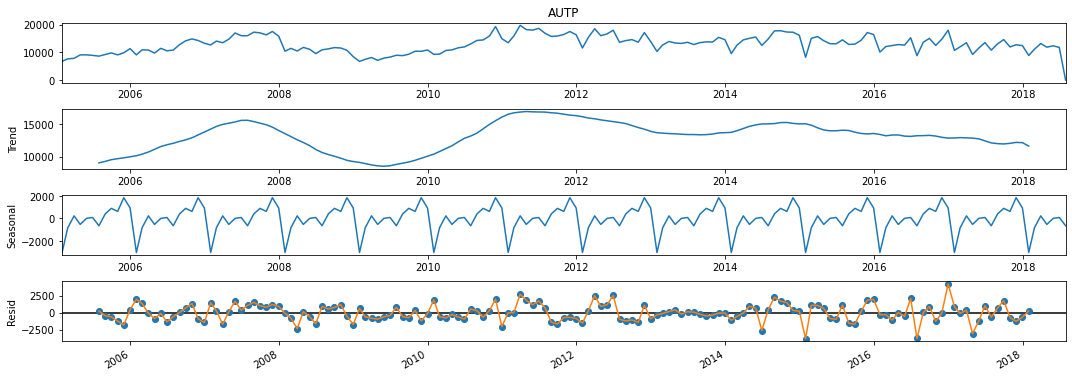

In [154]:
result = seasonal_decompose(ts, model='additive')
print(result.trend)
# print(result.seasonal)
print(result.resid)
#print(result.observed)
result.plot()
result.resid.plot()

<AxesSubplot:>

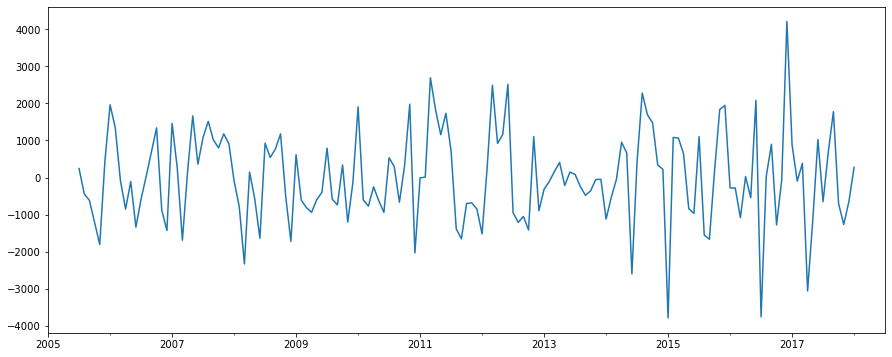

In [155]:
result.resid.plot()

In [157]:
#result.resid.dropna()
result.resid.head(10)

2005-01-31            NaN
2005-02-28            NaN
2005-03-31            NaN
2005-04-30            NaN
2005-05-31            NaN
2005-06-30            NaN
2005-07-31     240.560430
2005-08-31    -441.647903
2005-09-30    -616.728032
2005-10-31   -1218.820980
Freq: M, Name: resid, dtype: float64

In [158]:
result.resid.tail(10)

2017-10-31    -705.029314
2017-11-30   -1267.099826
2017-12-31    -647.712006
2018-01-31     274.938635
2018-02-28            NaN
2018-03-31            NaN
2018-04-30            NaN
2018-05-31            NaN
2018-06-30            NaN
2018-07-31            NaN
Freq: M, Name: resid, dtype: float64

<AxesSubplot:>

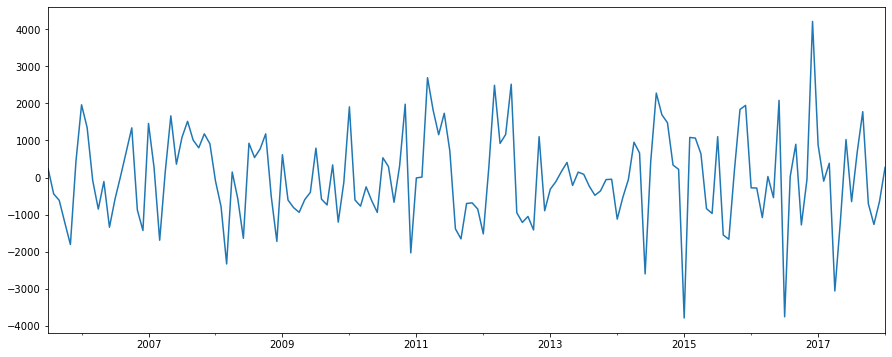

In [163]:
srt = result.resid.dropna()
srt.plot()

C:\Users\YULY\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\stattools.py:572: FutureWarning: fft=True will become the default in a future version of statsmodels. To suppress this warning, explicitly set fft=False.
  FutureWarning


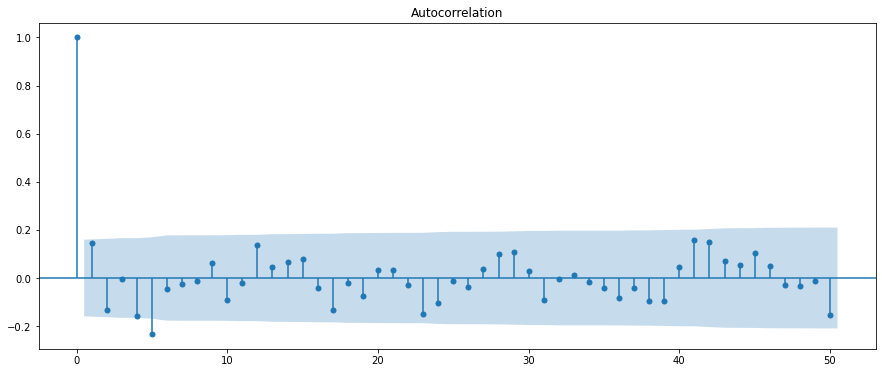

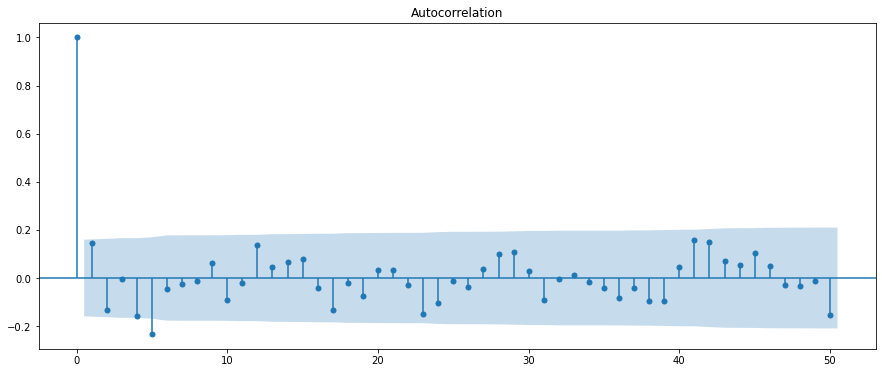

In [165]:
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.tsa.stattools import acf
acf(srt,nlags=50,unbiased=False)
plot_acf(srt, lags=50, unbiased=False)

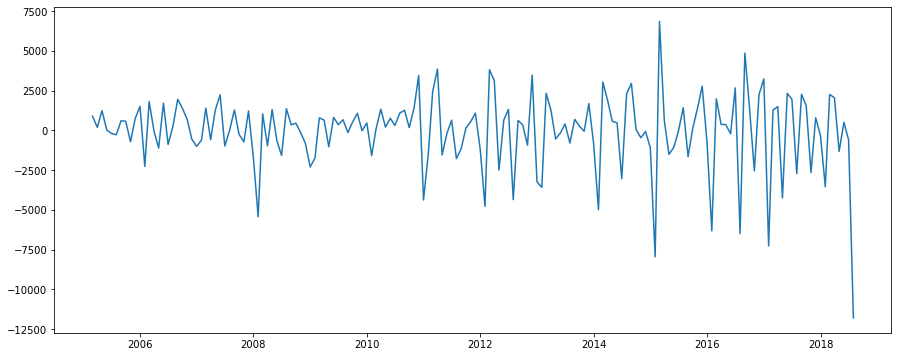

In [81]:
#%%#               DIFERENCIACION ORDINARIA Y ESTACIONAL
DF=pd.DataFrame(ts)
diford=DF.diff(periods=1)  ####Diferencia Ordinaria ( y que periods indica que realizara X_t - X_{t_1})
plt.plot(diford)                # en esta grafica se elimina la tendencia (oscilando alrededore de un valor fijo, aqui 0)

C:\Users\YULY\anaconda\lib\site-packages\numpy\core\_asarray.py:83: UserWarning: Warning: converting a masked element to nan.
  return array(a, dtype, copy=False, order=order)


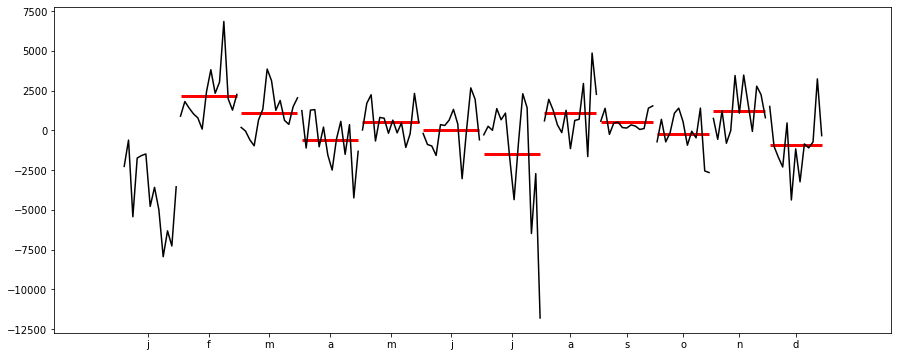

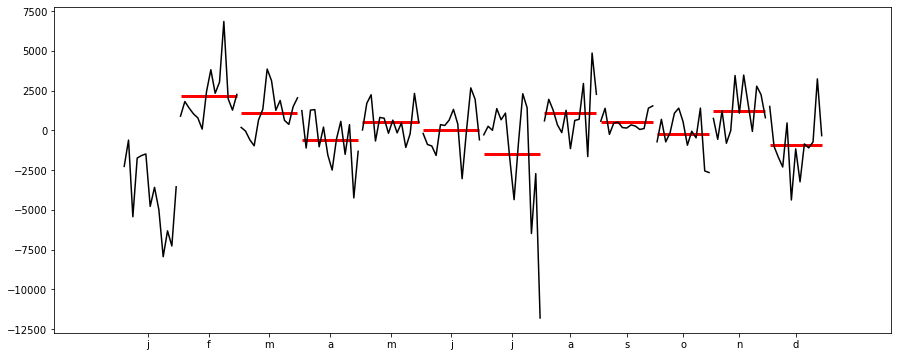

In [82]:
import statsmodels.api as smapi
smapi.graphics.tsa.month_plot(diford)

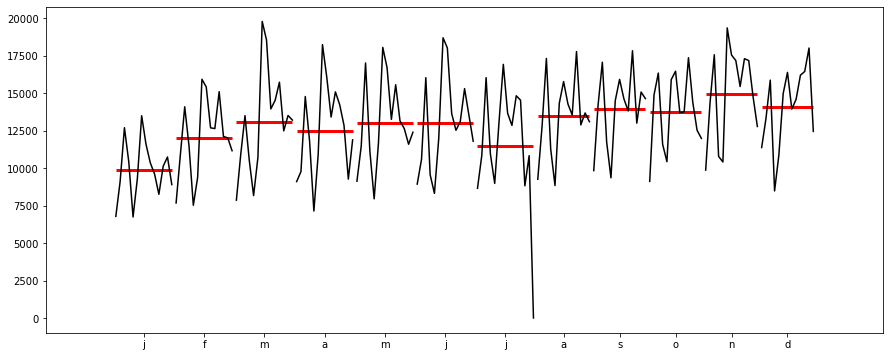

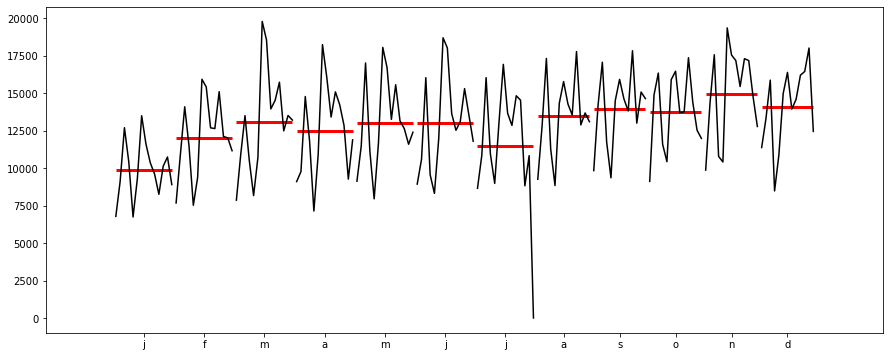

In [83]:
import statsmodels.api as smapi
smapi.graphics.tsa.month_plot(ts)
#smapi.graphics.tsa.month_plot(diford)


C:\Users\YULY\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\stattools.py:572: FutureWarning: fft=True will become the default in a future version of statsmodels. To suppress this warning, explicitly set fft=False.
  FutureWarning
C:\Users\YULY\anaconda\lib\site-packages\numpy\core\_asarray.py:83: UserWarning: Warning: converting a masked element to nan.
  return array(a, dtype, copy=False, order=order)


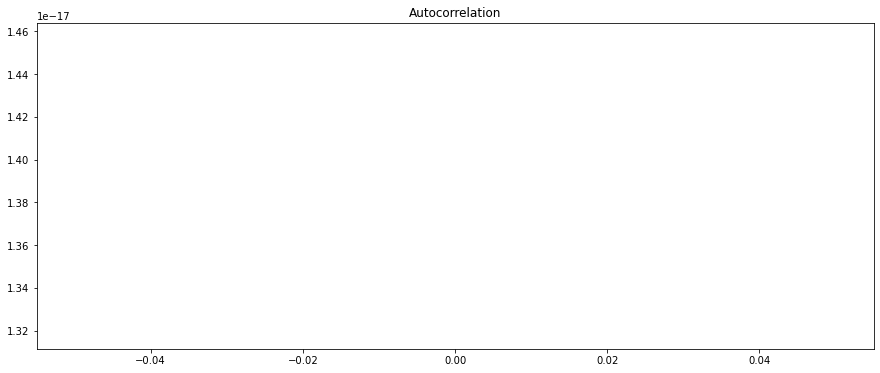

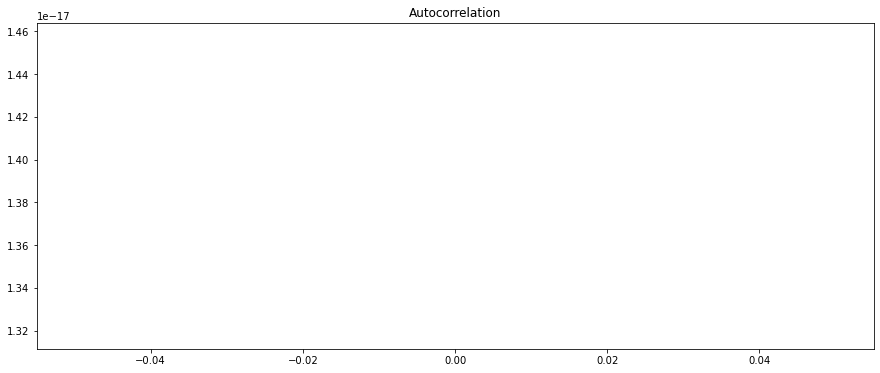

In [84]:
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.tsa.stattools import acf
acf(diford,nlags=50,unbiased=False)
plot_acf(diford, lags=50, unbiased=False)

               AUTP
2005-01-31      NaN
2005-02-28      NaN
2005-03-31      NaN
2005-04-30      NaN
2005-05-31      NaN
...             ...
2018-03-31   -305.0
2018-04-30   2621.0
2018-05-31    800.0
2018-06-30  -1750.0
2018-07-31 -10831.0

[163 rows x 1 columns]


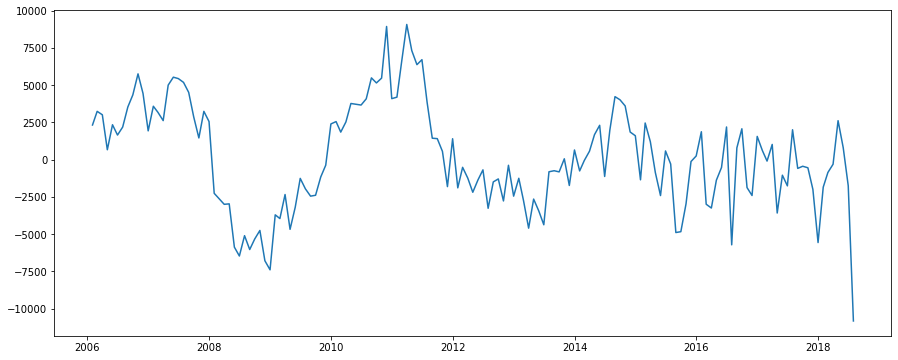

In [74]:
#DIFERENCIACION ESTACIONAL
difest=DF.diff(periods=12)    ###Diferencia Estacional ( y que periods indica que realizara X_t - X_{t_12})
print(difest)
plt.plot(difest)   #serie residual

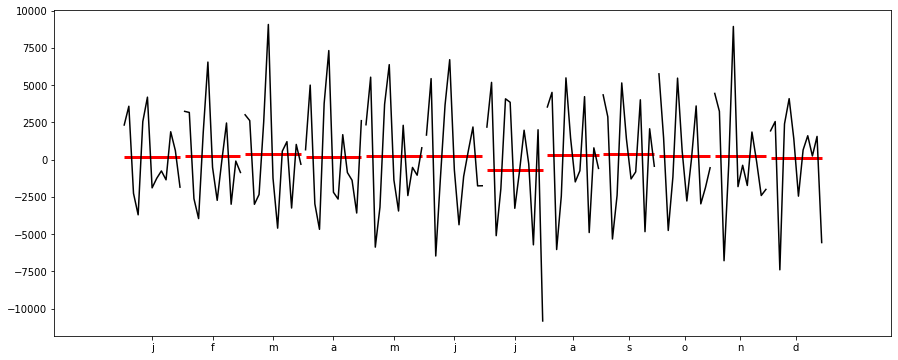

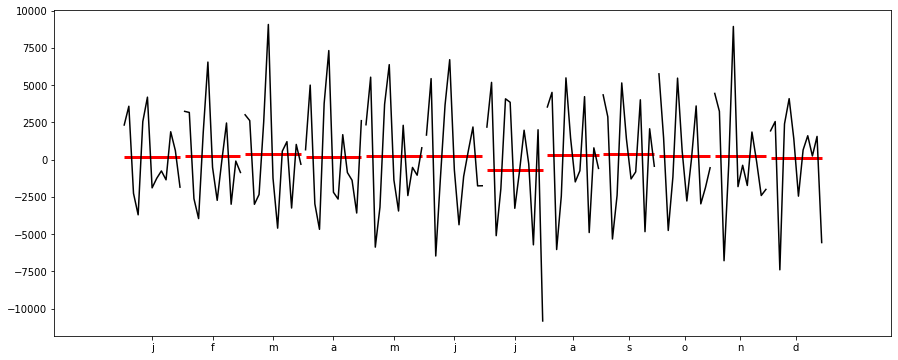

In [75]:
difest=difest[12:241]
smapi.graphics.tsa.month_plot(difest)

C:\Users\YULY\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\stattools.py:572: FutureWarning: fft=True will become the default in a future version of statsmodels. To suppress this warning, explicitly set fft=False.
  FutureWarning


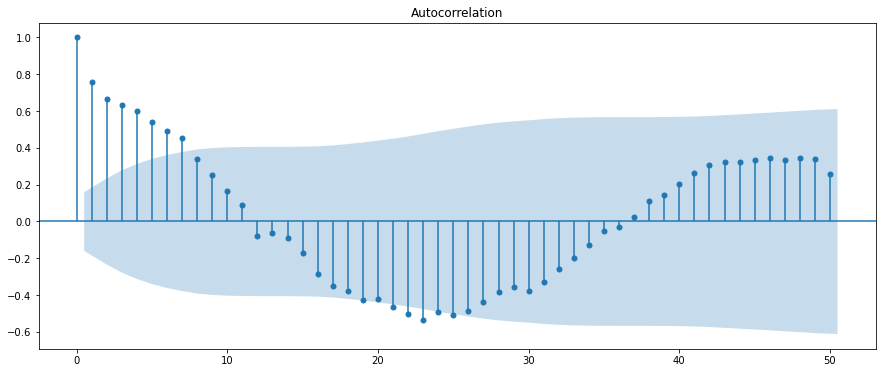

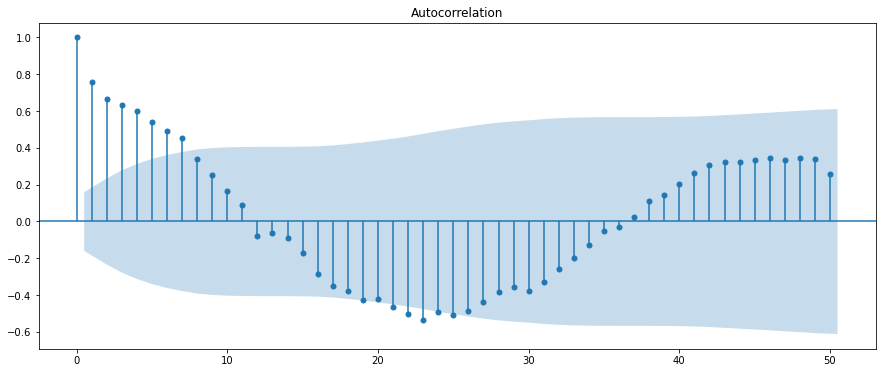

In [77]:
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.tsa.stattools import acf
acf(difest,nlags=50,unbiased=False)
plot_acf(difest, lags=50, unbiased=False)